# IRIS FLOWER CLASSIFICATION
* The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
* Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used forintroductory classification tasks.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data as csv file
data=pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#capitalizing the first letter of the column name
data=data.rename(columns=str.capitalize)
data.head()#first five elements of the datasets

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Statistical information about the data
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking the null values 
data.isna().any()

Sepal_length    False
Sepal_width     False
Petal_length    False
Petal_width     False
Species         False
dtype: bool

In [8]:
#unique values in the column
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#converting into numerical values
data['Species'].replace({
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
},inplace=True)

In [11]:
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
data['Species'].unique()

array([0, 1, 2], dtype=int64)

In [13]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

### Plotting the Data

<Axes: xlabel='Sepal_width', ylabel='Count'>

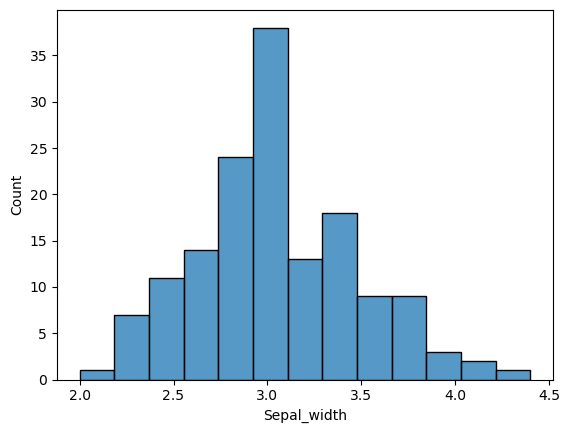

In [14]:
sns.histplot(data['Sepal_width'])

<Axes: xlabel='Sepal_length', ylabel='Count'>

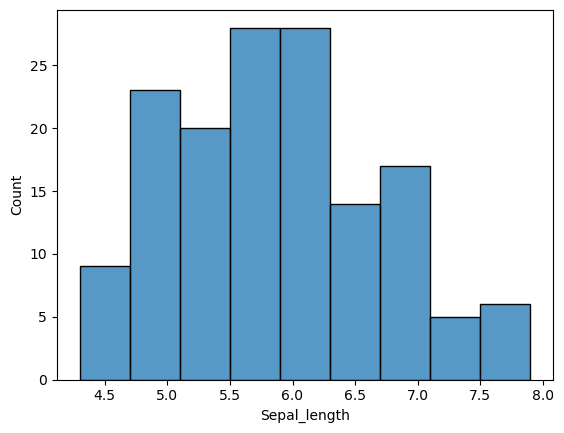

In [15]:
sns.histplot(data['Sepal_length'])

<Axes: xlabel='Petal_width', ylabel='Count'>

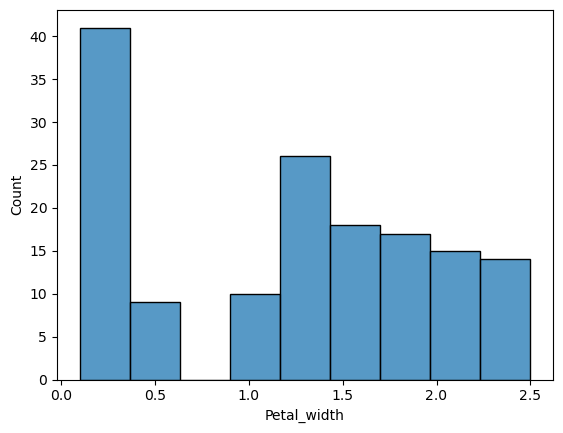

In [16]:
sns.histplot(data['Petal_width'])

<Axes: xlabel='Petal_length', ylabel='Count'>

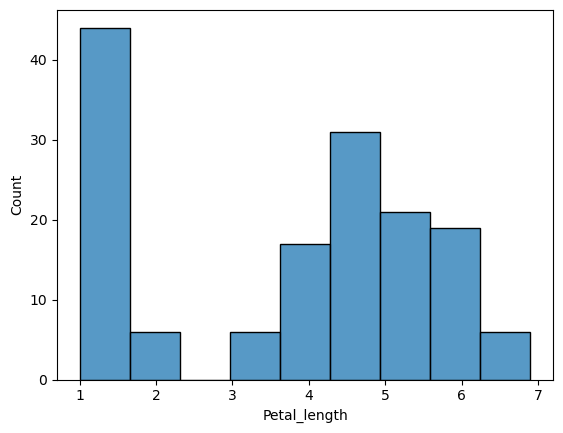

In [17]:
sns.histplot(data['Petal_length'])

# Model Building

### Splitting The Data

In [18]:
x=data.drop('Species',axis=1)
y=data['Species']

In [19]:
#mean values of each component of the flower
x.mean()

Sepal_length    5.843333
Sepal_width     3.054000
Petal_length    3.758667
Petal_width     1.198667
dtype: float64

In [20]:
print(x.shape,y.shape)

(150, 4) (150,)


In [21]:
#spliting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [22]:
print("Size of training data is",x_train.shape,y_train.shape)

Size of training data is (105, 4) (105,)


In [23]:
print("Size of testing data is",x_test.shape,y_test.shape)

Size of testing data is (45, 4) (45,)


### Building the Model and Training

In [24]:
#model training
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
y_pred=knn.predict(x_test)

In [27]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1], dtype=int64)

In [28]:
knn.score(x_test,y_test)

0.9777777777777777

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [30]:
y_pre_train=knn.predict(x_train)

In [31]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1], dtype=int64)

In [32]:
knn.score(x_train,y_train)

0.9523809523809523

In [33]:
print(confusion_matrix(y_train,y_pre_train))
print(classification_report(y_train,y_pre_train))

[[36  0  0]
 [ 0 28  4]
 [ 0  1 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.88      0.92        32
           2       0.90      0.97      0.94        37

    accuracy                           0.95       105
   macro avg       0.96      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy on the training data is ',accuracy_score(y_train,y_pre_train)*100)
print('Accuracy on the testing data is ',accuracy_score(y_test,y_pred)*100)

Accuracy on the training data is  95.23809523809523
Accuracy on the testing data is  97.77777777777777


### Predictions 

In [35]:
new=pd.DataFrame({'Sepal_length':[4.0],'Sepal_width':[3.0],'Petal_length':[1.1],'Petal_width':[0.3]})
prediction=knn.predict(new)
def pred(prediction):
    if prediction == 0:
        print('Setosa')
    elif prediction == 1:
        print('Versicolor')
    else:
        print('Virginica')
pred(prediction)

Setosa
